# Obtenção dos Dados

Este código baixa os arquivos do [_dataset_ MNIST](https://en.wikipedia.org/wiki/MNIST_database) a partir do [site](http://yann.lecun.com/exdb/mnist/) do [Prof. Yann LeCun](https://en.wikipedia.org/wiki/Yann_LeCun).

In [ ]:
# Imagens de treinamento
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -O train-images-idx3-ubyte.gz
# Rótulos (classes)
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -O train-labels-idx1-ubyte.gz
# Imagens de validação
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -O t10k-images-idx3-ubyte.gz
# Rótulos de validação (classes)
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -O t10k-labels-idx1-ubyte.gz

--2020-05-26 01:01:13--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.6.204, 104.28.7.204, 2606:4700:3031::681c:6cc, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.6.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  3.95MB/s    in 2.4s    

2020-05-26 01:01:16 (3.95 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2020-05-26 01:01:17--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.6.204, 104.28.7.204, 2606:4700:3033::681c:7cc, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.6.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===============

Abaixo extraímos os arquivos comprimidos. 

In [ ]:
# Extrai os arquivos treinamento
!gunzip *.gz

gzip: t10k-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: t10k-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: train-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y


# Leitura dos Dados

Abaixo definimos as funções auxiliares para leitura do arquivo de imagens

In [ ]:
import numpy as np
from struct import unpack

def read_imgs(img_filename):
  ''' Esta função lê o arquivo de imagens
      da base de dados MNIST
  '''

  # Abre o arquivo
  img_file = open(img_filename,'rb')

  # Lê o cabeçalho do arquivo
  magic = unpack('>i', img_file.read(4))[0]
  total = unpack('>i', img_file.read(4))[0]
  height = unpack('>i', img_file.read(4))[0]
  width = unpack('>i', img_file.read(4))[0]

  # Verifica se o arquivo passa no teste
  # básico (este número deve ser sempre 2051)
  if magic != 2051:
    print('Erro, este arquivo não parece ser um arquivo de imagens MNIST')

  # Aqui criamos a array do NumPy que armazenará
  # as imagens
  imgs = np.zeros((total,height,width))

  # Nesse laço vamos lendo cada pixel e preenchendo
  # no array
  for k in range(total): # Cada amostra k
    for i in range(height): # Cada linha i
      for j in range(width): # Cada coluna j
        imgs[k,i,j] = ord(img_file.read(1)) # Lemos 1 byte
  
  # Retornamos o array preenchido
  return imgs

De forma semelhante ao realizado acima, aqui abaixo definimos as funções auxiliares para leitura do arquivo de rótulos.

In [ ]:
def read_labels(labels_filename):
  ''' Esta função lê o arquivo de rótulos
      da base de dados MNIST
  '''

  # Abre o arquivo
  labels_file = open(labels_filename,'rb')

  # Lê o cabeçalho do arquivo
  magic = unpack('>i', labels_file.read(4))[0]
  total = unpack('>i', labels_file.read(4))[0]

  # Verifica se o arquivo passa no teste
  # básico (este número deve ser sempre 2051)
  if magic != 2049:
    print('Erro, este arquivo não parece ser um arquivo de imagens MNIST')

  # Aqui criamos a array do NumPy que armazenará
  # as imagens
  labels = np.zeros((total))

  # Nesse laço vamos lendo cada label e preenchendo
  # no array
  for k in range(total): # Cada amostra k
    labels[k] = ord(labels_file.read(1)) # Lemos 1 byte
  
  # Retornamos o array preenchido
  return labels

Nas linhas abaixo chamamos as função de leitura para carregar as imagens e os respectivos rótulos

In [ ]:
# Lê dados de treinamento
imgs = read_imgs('train-images-idx3-ubyte')
labels = read_labels('train-labels-idx1-ubyte')

# Lê dados de validação
imgs_val = read_imgs('t10k-images-idx3-ubyte')
labels_val = read_labels('t10k-labels-idx1-ubyte')

In [ ]:
import numpy as np

print(imgs.shape[0])
print(imgs.shape[1])
print(imgs.shape[2])
print(labels.shape[0])


60000
28
28
60000


1 - a) Significa o número de imagens.

b e c) Significam o número de linhas e colunas que armanzenam os pixels das imagens.

d) Significa o número de rótulos das imagens.

<Figure size 432x288 with 0 Axes>

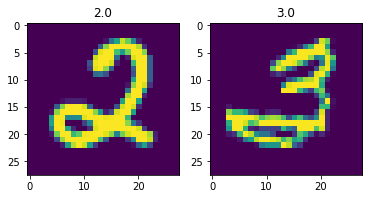

<Figure size 432x288 with 0 Axes>

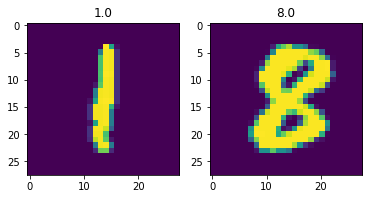

<Figure size 432x288 with 0 Axes>

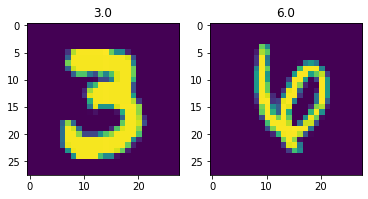

<Figure size 432x288 with 0 Axes>

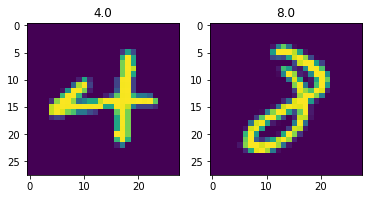

<Figure size 432x288 with 0 Axes>

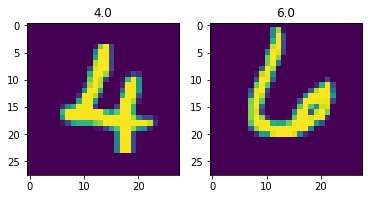

<Figure size 432x288 with 0 Axes>

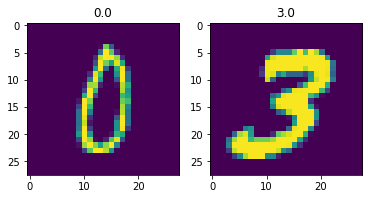

In [ ]:
import random
import matplotlib.pyplot as plt

n_img = imgs.shape[0]
#idx = list(rang(n_img))
idx = np.random.randint(0 ,n_img,12)

for i in range(0,idx.shape[0],2):
  plt.figure()
  f, (ax1,ax2) = plt.subplots(1,2)
  ax1.imshow(imgs[idx[i],:,:])
  ax1.set_title(labels[idx[i]])
  ax2.imshow(imgs[idx[i+1],:,:])
  ax2.set_title(labels[idx[i+1]])

In [ ]:
# Randomizando o dataset
idx = list(range(n_img))
np.random.shuffle(idx)
random_imgs = np.zeros((imgs.shape[0],imgs.shape[1],imgs.shape[2]))
random_labels = np.zeros((imgs.shape[0],1))
for i in range(imgs.shape[0]):
  random_imgs[i,:,:] = imgs[idx[i],:,:]
  random_labels[i] = labels[idx[i]]

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

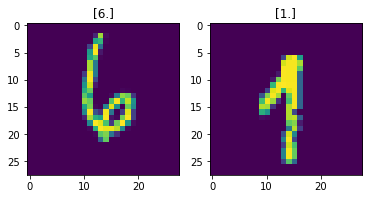

<Figure size 432x288 with 0 Axes>

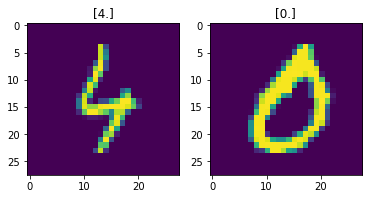

<Figure size 432x288 with 0 Axes>

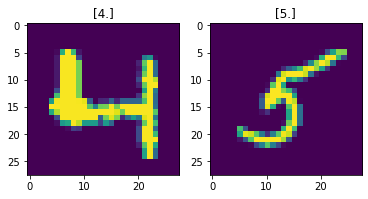

<Figure size 432x288 with 0 Axes>

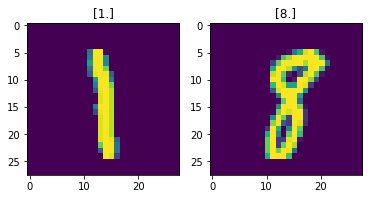

<Figure size 432x288 with 0 Axes>

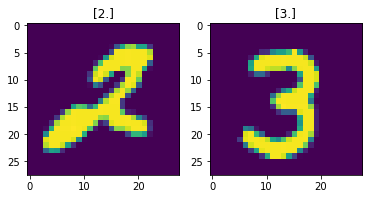

<Figure size 432x288 with 0 Axes>

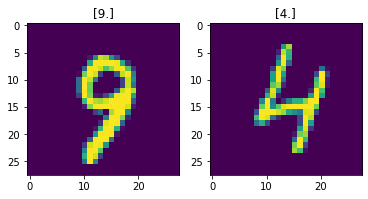

In [ ]:
n_img = imgs.shape[0]
#idx = list(rang(n_img))
idx = np.random.randint(0 ,n_img,12)

for i in range(0,idx.shape[0],2):
  plt.figure()
  f, (ax1,ax2) = plt.subplots(1,2)
  ax1.imshow(random_imgs[idx[i],:,:])
  ax1.set_title(random_labels[idx[i]])
  ax2.imshow(random_imgs[idx[i+1],:,:])
  ax2.set_title(random_labels[idx[i+1]])

In [ ]:
# Serializando e normalizando os dados
X = np.zeros((imgs.shape[0], imgs.shape[1]*imgs.shape[2]))
for i in range(imgs.shape[0]):
  X[i,:] = random_imgs[i,:,:].flatten() # Transformando a imagem 2d em um array 1d
  X[i,:] = X[i,:]/255 # Colocando os valores de cada imagem entre 0 e 1


In [ ]:
unique_labels = np.unique(labels)
print('Labels:')
print(unique_labels)
print(labels)

Labels:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[5. 0. 4. ... 5. 6. 8.]


In [ ]:
# One hot encoding
Y_desired = np.zeros((n_img,unique_labels.shape[0]))
for i in range(Y_desired.shape[0]):
  Y_desired[i,:] = (unique_labels == random_labels[i])
  #print(Y_desired[i,:])

In [ ]:
# Sigmoid
def sigmoid(x):
  return 1/(1+np.exp(-x))
# Softmax
def softmax(x):
  return x/sum(np.exp(x))

In [ ]:
# Perceptron

class Perceptron():
  def __init__(self):
    # Camada escondida 1
    self.Wh1 = np.random.random((256,28*28))*2.0 - 1.0
    self.bh1 = np.random.random((256,1))*2.0 - 1.0
    # Camada escondida 2
    self.Wh2 = np.random.random((64,256))*2.0 - 1.0
    self.bh2 = np.random.random((64,1))*2.0 - 1.0
    # Camada de saída
    self.Wo = np.random.random((10,64))*2.0 - 1.0
    self.bo = np.random.random((10,1))*2.0 - 1.0
    # Passo de aprendizagem
    self.eta = 0.1
  def forward(self,X):
    X = np.reshape(X,(X.shape[0],1))
    # Camada escondida 1
    self.sh1 = np.dot(self.Wh1,X) + self.bh1
    self.zh1 = sigmoid(self.sh1)
    # Camada escondida 2
    self.sh2 = np.dot(self.Wh2,self.zh1) + self.bh2
    self.zh2 = sigmoid(self.sh2)
    # Camada de saída
    self.so = np.dot(self.Wo,self.zh2) + self.bo
    self.zo = sigmoid(self.so)
    return np.reshape(softmax(self.zo),(10,1))

  def backprop(self,x,y_desired):
    y = self.forward(x)
    y_desired = np.reshape(y_desired,(10,1))
    diff = (y - y_desired)
    # Calculando os deltas
    deltao =(diff)*(self.zo*(1.0 - self.zo))# Delta da camada escondida = diferença entra o calculado e estimada * derivada dos valores somados na camada
    #l,w = np.shape(deltao)
    #print(l)
    #print(w)
    deltah2= np.dot(self.Wo.T, deltao)*(self.zh2*(1.0 - self.zh2))
    #l,w = np.shape(deltah2)
    #print(l)
    #print(w)
    deltah1= np.dot(self.Wh2.T, deltah2)*(self.zh1*(1.0 - self.zh1))
    #Calculando os novos pesos
    self.Wo = self.Wo - self.eta*(deltao*self.zh2.T)
    self.Wh1 = self.Wh1 - self.eta*(deltah1*x.T)
    self.Wh2 = self.Wh2 - self.eta*(deltah2*self.zh1.T)
    # Calculando os novos bias
    self.bo = self.bo - self.eta*deltao
    self.bh2 = self.bh2 - self.eta*deltah2
    self.bh1 = self.bh1 - self.eta*deltah1
    return sum(diff**2)/2
    
  def train(self,X,Y,n):
    error = np.zeros(n)
    for j in range(n):
      err = 0
      for i in range(X.shape[0]):
        k = self.backprop(X[i,:],Y[i,:])
        err = err + k
      err = err/X.shape[0]
      print(err)
      error[j]= err
    return error


In [ ]:
p = Perceptron()
result = p.train(X,Y_desired,10)

[0.45708486]
[0.44600009]
[0.4428377]
[0.43583358]
[0.42608733]
[0.42401238]
[0.4229494]
[0.42222395]
[0.42168597]
[0.42124331]


Text(0.5, 0, 'Épocas')

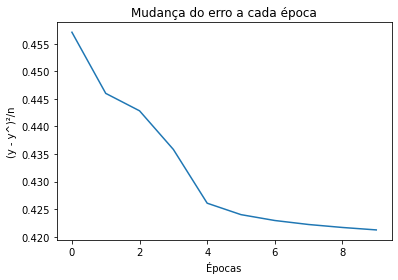

In [ ]:
import matplotlib.pyplot as plt
plt.show()
plt.plot(result)
plt.title('Mudança do erro a cada época')
plt.ylabel('(y - y^)²/n')
plt.xlabel('Épocas')

In [ ]:
# Serialização e normalização
X_val = np.zeros((imgs_val.shape[0], imgs_val.shape[1]*imgs_val.shape[2]))
for i in range(imgs_val.shape[0]):
  X_val[i,:] = imgs_val[i,:,:].flatten() # Transformando a imagem 2d em um array 1d
  X_val[i,:] = X_val[i,:]/255 # Colocando os valores de cada imagem entre 0 e 1


(10000,)


In [ ]:
def accuracy(p,x,y,print = 0):
  c =0
  for i in range(y.shape[0]):
    k = p.forward(x[i,:])
    idx = np.argmax(k)
    if idx == y[i] :
      c = c + 1
    # Print == 1 para exibir a comparação de alguns valores
    if print ==1:
      if i%1000 == 0:
        print(idx,y[i])
  return print((c/x.shape[0])*100, '% de acerto' )

In [ ]:
# Testando o acerto para os dados de validação
accuracy(p,X_val,labels_val)
print('Teste com os dados de validação')

7 7.0
9 9.0
6 6.0
6 6.0
9 9.0
3 3.0
9 9.0
1 1.0
4 4.0
7 7.0
95.22 % de acerto
Teste com os dados de validação


In [ ]:
# Testando o acerto para os dados de validação
accuracy(p,X,random_labels)
print('Teste com os dados usados no treinamento')

0 [0.]
2 [2.]
8 [5.]
1 [1.]
8 [8.]
0 [0.]
0 [0.]
1 [1.]
5 [5.]
8 [8.]
9 [9.]
4 [4.]
2 [2.]
1 [1.]
3 [3.]
3 [3.]
0 [0.]
8 [8.]
4 [4.]
2 [2.]
8 [8.]
4 [4.]
7 [7.]
5 [5.]
9 [9.]
9 [9.]
4 [4.]
0 [0.]
4 [4.]
6 [6.]
2 [2.]
9 [9.]
2 [2.]
7 [7.]
4 [4.]
3 [3.]
6 [6.]
2 [2.]
3 [3.]
0 [0.]
6 [6.]
1 [1.]
2 [2.]
3 [3.]
5 [5.]
2 [2.]
7 [7.]
6 [6.]
4 [4.]
6 [6.]
7 [7.]
9 [9.]
4 [4.]
9 [9.]
7 [7.]
5 [5.]
1 [1.]
9 [9.]
6 [6.]
0 [0.]
96.74166666666667 % de acerto
Teste com os dados usados no treinamento
